In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../..")

from tools.curbd import curbd
import numpy as np
import pylab

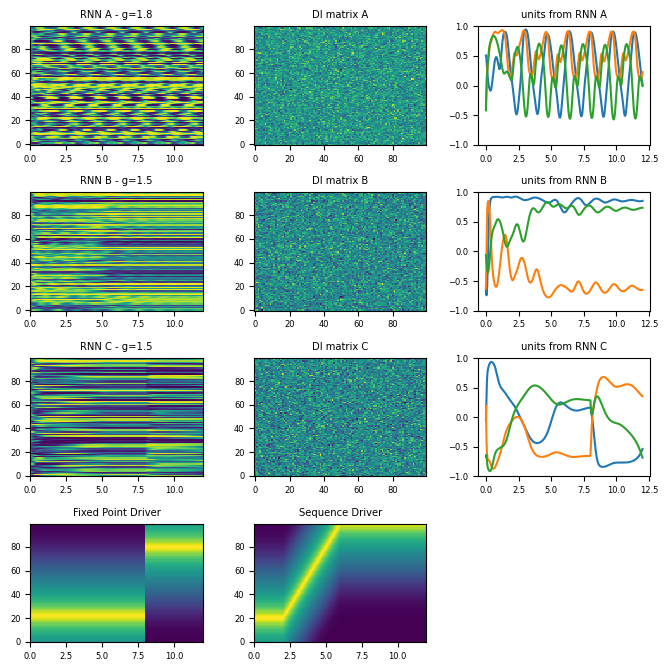

In [3]:
sim = curbd.threeRegionSim(number_units=100)

In [4]:
# Stack neurons
activity = np.concatenate((sim['Ra'], sim['Rb'], sim['Rc']), 0)  
activity.shape

(300, 1201)

trial=0 pVar=0.938041 chi2=28.699365


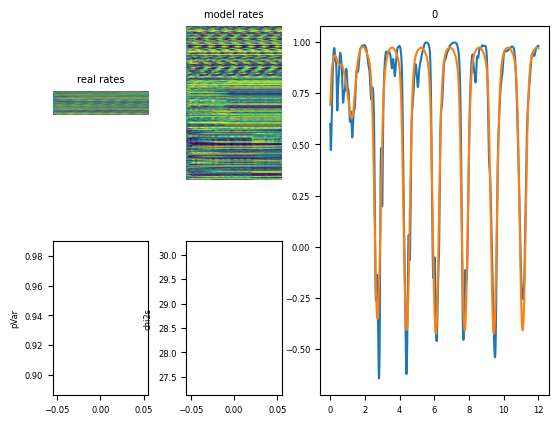

trial=1 pVar=0.979986 chi2=9.412337
trial=2 pVar=0.983906 chi2=7.281433
trial=3 pVar=0.987414 chi2=5.843189
trial=4 pVar=0.988559 chi2=5.075602
trial=5 pVar=0.989712 chi2=4.681527
trial=6 pVar=0.990612 chi2=4.096825
trial=7 pVar=0.991664 chi2=3.698025
trial=8 pVar=0.991881 chi2=3.383523
trial=9 pVar=0.992997 chi2=3.048528
trial=10 pVar=0.993484 chi2=2.782492
trial=11 pVar=0.993921 chi2=2.576007
trial=12 pVar=0.994258 chi2=2.452931
trial=13 pVar=0.994429 chi2=2.414320
trial=14 pVar=0.994463 chi2=2.394353
trial=15 pVar=0.994524 chi2=2.351430
trial=16 pVar=0.994594 chi2=2.299167
trial=17 pVar=0.994656 chi2=2.250963
trial=18 pVar=0.994723 chi2=2.205696
trial=19 pVar=0.994785 chi2=2.159788
trial=20 pVar=0.994845 chi2=2.105608
trial=21 pVar=0.994964 chi2=2.032808
trial=22 pVar=0.995173 chi2=1.940853
trial=23 pVar=0.995414 chi2=1.844060
trial=24 pVar=0.995638 chi2=1.754439
trial=25 pVar=0.995826 chi2=1.678450
trial=26 pVar=0.995973 chi2=1.619071
trial=27 pVar=0.996080 chi2=1.574400
trial=28 p

In [5]:
Na = sim['params']['Na']
Nb = sim['params']['Nb']
Nc = sim['params']['Nc']

regions = []
regions.append(['Region A', np.arange(0, Na)])
regions.append(['Region B', np.arange(Na, Na + Nb)])
regions.append(['Region C', np.arange(Na + Nb, Na + Nb + Nc)])
regions = np.array(regions, dtype=object)


model = curbd.trainMultiRegionRNN(activity,
                                  dtData=sim['params']['dtData'],
                                  dtFactor=5,
                                  regions=regions,
                                  tauRNN=2*sim['params']['tau']/2,
                                  nRunTrain=500,
                                  verbose=True,
                                  nRunFree=5)


[curbd_arr, curbd_labels] = curbd.computeCURBD(model)

In [23]:
n_regions = curbd_arr.shape[0]
n_region_units = curbd_arr[0, 0].shape[0]

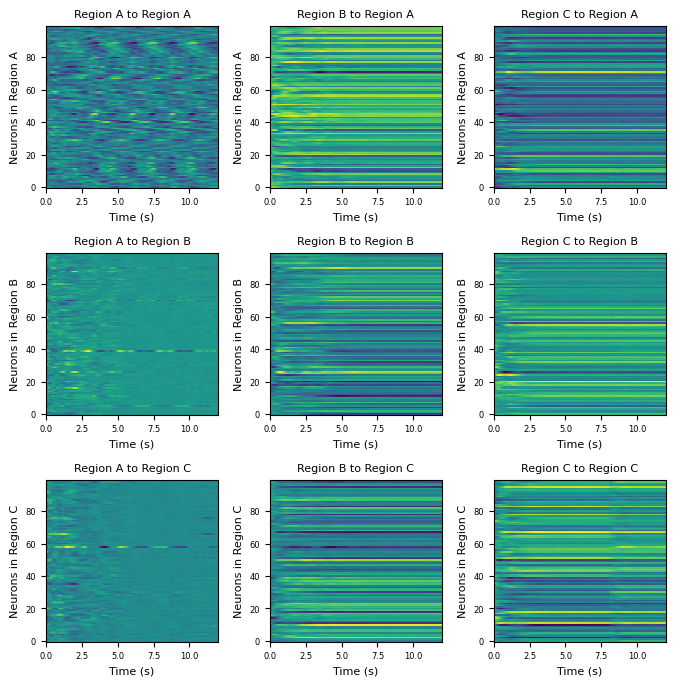

In [28]:
n_regions = curbd_arr.shape[0]
n_region_units = curbd_arr[0, 0].shape[0]

fig = pylab.figure(figsize=[8, 8])
count = 1
for iTarget in range(n_regions):
    for iSource in range(n_regions):
        axn = fig.add_subplot(n_regions, n_regions, count)
        count += 1
        axn.pcolormesh(model['tRNN'], range(n_region_units),
                       curbd_arr[iTarget, iSource])
        axn.set_xlabel('Time (s)')
        axn.set_ylabel('Neurons in {}'.format(regions[iTarget, 0]))
        axn.set_title(curbd_labels[iTarget, iSource])
        axn.title.set_fontsize(8)
        axn.xaxis.label.set_fontsize(8)
        axn.yaxis.label.set_fontsize(8)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.show()

In [1]:
model = curbd.trainMultiRegionRNN(
    activity,
    dtData=sim['params']['dtData'],
    dtFactor=5,
    regions=regions,
    tauRNN=2*sim['params']['tau']/2,
    nRunTrain=500,
    verbose=True,
    nRunFree=5,
    plotStatus=False
)

NameError: name 'curbd' is not defined